# Data PreProcessing
In this file we find all the preprocessing necessary to obtain the data on which to perform the subsequent analyses!

In [53]:
import pandas as pd
import numpy as np
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import scr.utils as utils
#importlib.reload(scr.utils)

In [116]:
# Loading Data non-processed
original_PATH = 'data/Original'

beers_ba = pd.read_csv(original_PATH + '/BeerAdvocate/beers.csv')  
breweries_ba = pd.read_csv(original_PATH + '/BeerAdvocate/breweries.csv') 
users_ba = pd.read_csv(original_PATH + '/BeerAdvocate/users.csv')

beers_rb = pd.read_csv(original_PATH + '/RateBeer/beers.csv')
breweries_rb = pd.read_csv(original_PATH + '/RateBeer/breweries.csv')
users_rb = pd.read_csv(original_PATH + '/RateBeer/users.csv')

# Beer Preprocessing
In this section, we begin the preprocessing of the beer datasets! Our first step is to examine the data to determine whether it is feasible to merge the two datasets or if they originate from different distributions, which would require us to analyze them separately. Before assessing the possibility of merging, we will filter each dataset to include only beers with `nbr_ratings > 0` and `avg` column not NaN. This second check might seem redundant, but for the RateBeer dataset, it is necessary because there are some rows where, even though the rating is greater than 0, the `avg` column contains NaN values.

In [4]:
beers_rb.tail()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
442076,189684,Stela Selekt,1107,Stefani & Co,Pilsener,5,NaN,NaN,2.19,4.7,1.500000,NaN,0,NaN
442077,84884,Hotel Martini Donauer,9355,Hotel Martini,Pale Lager,1,NaN,NaN,2.77,NaN,2.900000,NaN,0,NaN
442078,93783,Birra Rozafa,9928,Rozafa Brewery,Pale Lager,1,NaN,NaN,2.64,NaN,2.000000,NaN,0,NaN
442079,220897,Svejk Blonde,17155,Svejk Beer Garden,Pale Lager,4,NaN,NaN,2.70,NaN,2.500000,NaN,0,NaN
442080,220898,Svejk Dark,17155,Svejk Beer Garden,Dunkel/Tmavý,3,NaN,NaN,2.55,NaN,2.133333,NaN,0,NaN


In [32]:
def beer_preprocessing(beers_dataset,dataset_name):   
    print('\nLET ANALIZE THE DATASET', dataset_name)
    print('#Let now see some important information about this starting dataset of beer!')
    print('- Dimension:', beers_dataset.shape)
    print('- Columns:',beers_dataset.columns)
    print('- Are all the id unique? Answer:', beers_dataset['beer_id'].is_unique)
    print('- Are there some values that are NaN inside the dataset? Answer:',beers_dataset.isna().any().any())
    
    # Now we are interested in keeping only the beers that have nbr_ratings>0 and 'avg' notNaN
    # The second check is redundant for Beer Advocate but necessary for RateBeer. 
    # We do it just to ensure that no row with a NaN value in the `avg` column is included.
    beers_filt = beers_dataset[(beers_dataset['nbr_ratings'] > 0) & (beers_dataset['avg'].notna())].copy()
    print('\n#Now we select only beer with nbr_reviews and nbr_ratings>0')
    print('- Dimension of filtered dataset:', beers_filt.shape)
    rating_size = (beers_filt['nbr_ratings']==0).sum()
    print('- Dimension of filtered dataset without ratings:', rating_size, '   [if ==0 means that all data has ratings]')
    
    if 'nbr_reviews' in beers_dataset.columns:
        # Both 'nbr_ratings' and 'nbr_reviews' exist
        review_size = (beers_filt['nbr_reviews']==0).sum()
        print('- Dimension of filtered dataset without reviews:', review_size, '   [if ==0 means that all data has reviews]')
        print('\n#Let see How data are distributed inside the review\n')
        print( beers_filt['nbr_reviews'].describe())
        
    print('\n#Let see How data are distributed inside the ratings\n')
    print( beers_filt['nbr_ratings'].describe())
    print('###################################################################################')
    # beers_filt['beer_id'].duplicated().astype(int).sum() --> just as double check you can do to see that the beer_id are all unique
    return beers_filt

beers_BA = beer_preprocessing(beers_ba, 'Beer Advocate')
beers_RB = beer_preprocessing(beers_rb, 'RateBeer')


LET ANALIZE THE DATASET Beer Advocate
#Let now see some important information about this starting dataset of beer!
- Dimension: (280823, 15)
- Columns: Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True

#Now we select only beer with nbr_reviews and nbr_ratings>0
- Dimension of filtered dataset: (247982, 15)
- Dimension of filtered dataset without ratings: 0    [if ==0 means that all data has ratings]
- Dimension of filtered dataset without reviews: 81333    [if ==0 means that all data has reviews]

#Let see How data are distributed inside the review

count    247982.000000
mean         10.442637
std          73.197759
min           0.000000
25%           0.000000
5

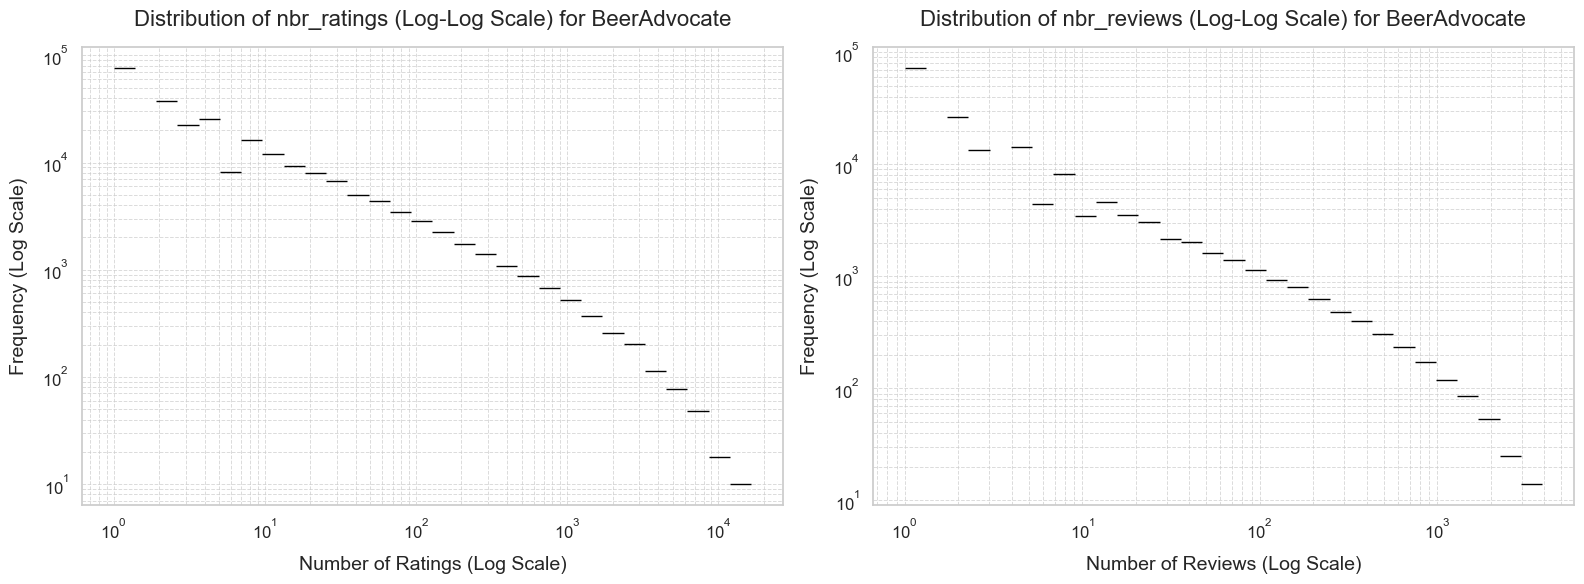

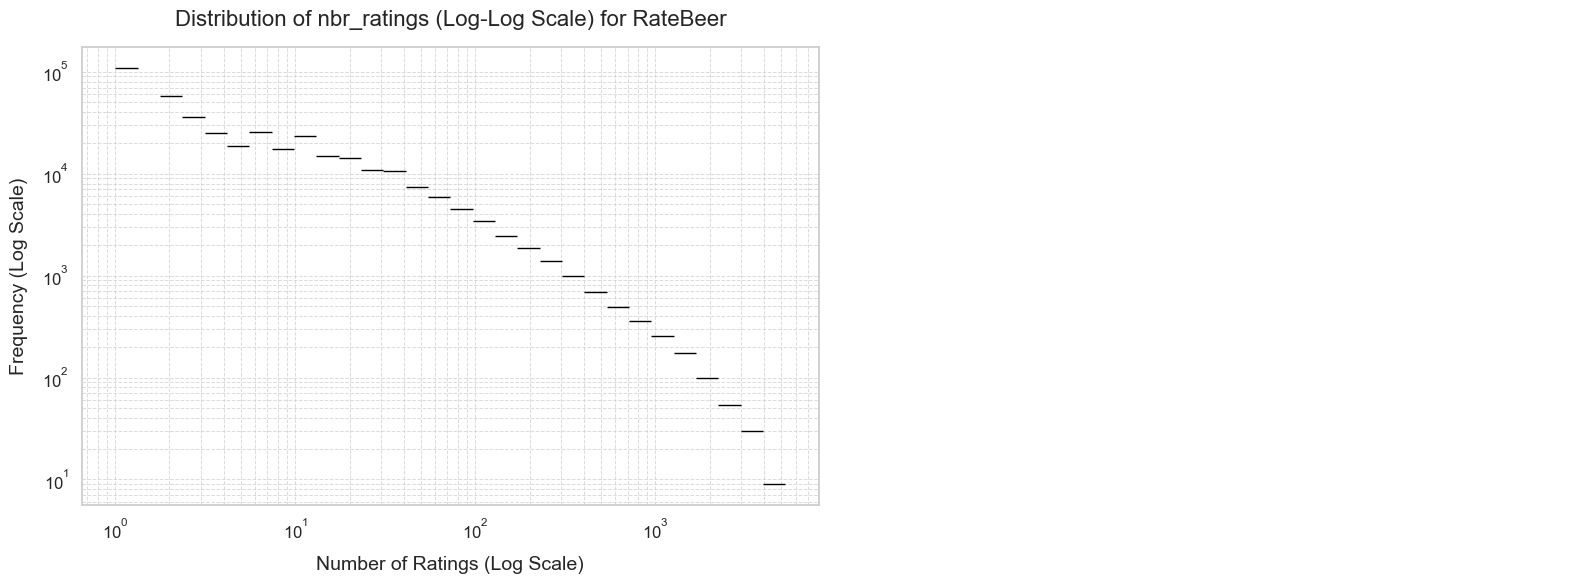

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def dist_rating_review(beers_filt, dataset_name):
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Subplot per 'nbr_ratings'
    sns.histplot(beers_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black", ax=axes[0])
    axes[0].set_xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
    axes[0].set_ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
    axes[0].set_title(f'Distribution of nbr_ratings (Log-Log Scale) for {dataset_name}', fontsize=16, pad=15)
    axes[0].tick_params(axis='x', labelsize=12)
    axes[0].tick_params(axis='y', labelsize=12)
    axes[0].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    if 'nbr_reviews' in beers_filt.columns:
        # Subplot per 'nbr_reviews'
        sns.histplot(beers_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black", ax=axes[1])
        axes[1].set_xlabel('Number of Reviews (Log Scale)', fontsize=14, labelpad=10)
        axes[1].set_ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
        axes[1].set_title(f'Distribution of nbr_reviews (Log-Log Scale) for {dataset_name}', fontsize=16, pad=15)
        axes[1].tick_params(axis='x', labelsize=12)
        axes[1].tick_params(axis='y', labelsize=12)
        axes[1].grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
    else:
        # Leave the second subplot empty (i.e., do nothing)
        axes[1].axis('off')  # Hide the second subplot
    plt.tight_layout()
    plt.show()
    return None

dist_rating_review(beers_BA, 'BeerAdvocate')
dist_rating_review(beers_RB, 'RateBeer')

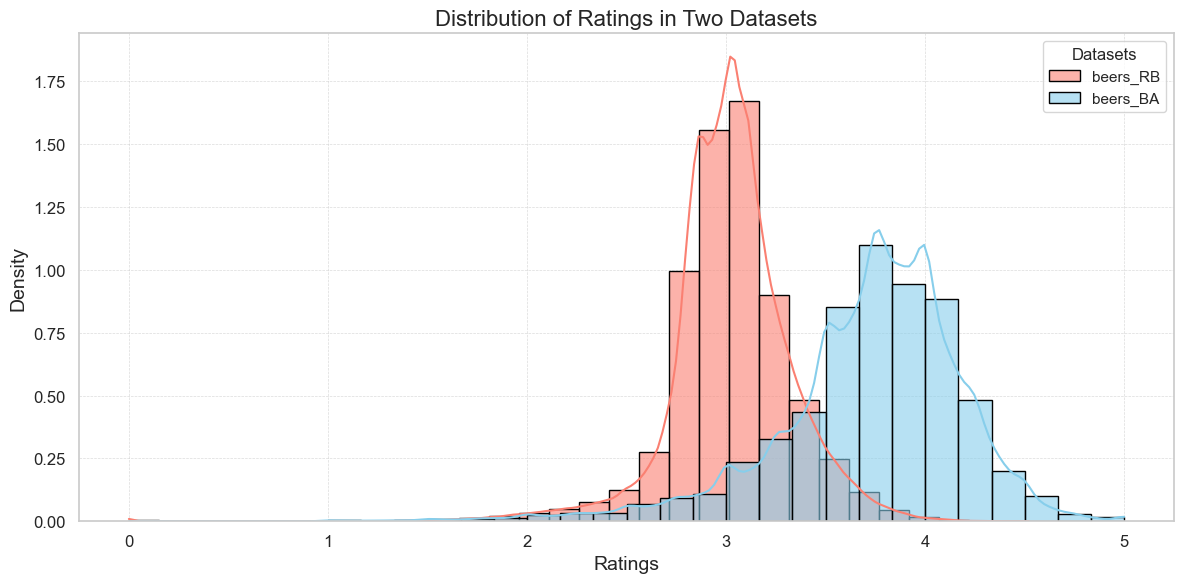

In [13]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# create two histogram for the two datasets (filtered ones)
sns.histplot(beers_RB['avg'], bins=30, color="salmon", label="beers_RB", kde=True, stat="density", edgecolor="black", alpha=0.6)
sns.histplot(beers_BA['avg'], bins=30, color="skyblue", label="beers_BA", kde=True, stat="density", edgecolor="black", alpha=0.6)

# title and labels
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Ratings in Two Datasets', fontsize=16)
plt.legend(title="Datasets")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

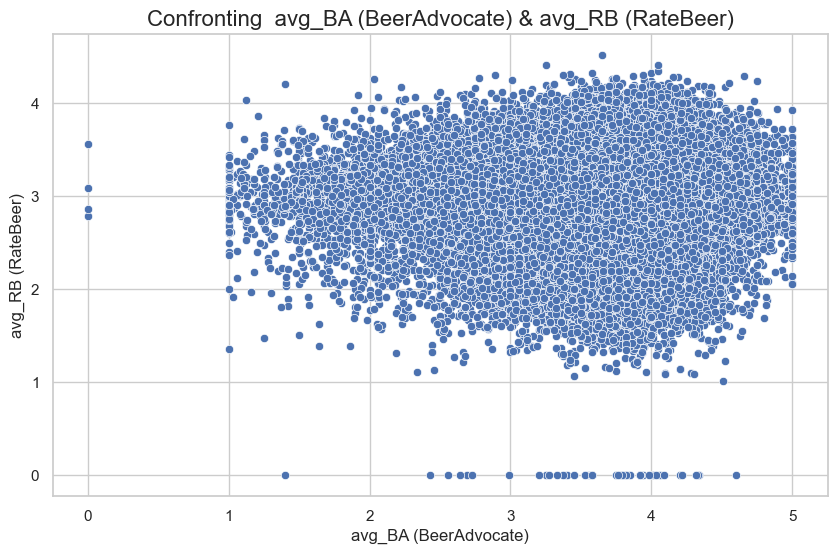

In [33]:
# Let's do some more tests to see if we can merge them
beers_BA_copy=beers_BA.copy()
beers_RB_copy=beers_RB.copy()

# We merge on beer_id because is unique
df_combined = pd.merge(
    beers_BA_copy[['beer_id', 'avg']].rename(columns={'avg': 'avg_BA'}),
    beers_RB_copy[['beer_id', 'avg']].rename(columns={'avg': 'avg_RB'}),
    on='beer_id',
    how='inner'
)
# Drop rows where either 'avg_ba' or 'avg_rb' is NaN
df_combined = df_combined.dropna(subset=['avg_BA', 'avg_RB'])

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_BA', y='avg_RB', data=df_combined)

# Label and Title
plt.title('Confronting  avg_BA (BeerAdvocate) & avg_RB (RateBeer)', fontsize=16)
plt.xlabel('avg_BA (BeerAdvocate)', fontsize=12)
plt.ylabel('avg_RB (RateBeer)', fontsize=12)

plt.show()

Their distributions seem quite distinct from one another. To determine whether each distribution follows a normal distribution, we will apply the **Shapiro-Wilk test**.

In [34]:
from scipy import stats

# To check if the distribution of `avg` values in each dataset (`beers_BA_copy` and `beers_RB_copy`) is normal, 
# we can perform the Shapiro-Wilk test on both `avg` columns.
# This test will help us determine whether the distribution of average scores (`avg`) in each dataset follows a normal distribution.

# We skip the NaN values because otherwise, it’s not possible to run the Shapiro-Wilk test.
# Although this reduces the dataset size slightly, it remains large enough for the test to be meaningful.
avg_BA = beers_BA_copy['avg'] 
avg_RB = beers_RB_copy['avg'] 
print('BeerAdvocate - Dimension of dataset:',beers_BA_copy.shape[0], 'Dimension of avg without NaN value:' ,avg_BA.shape[0])
print('RateBeer - Dimension of dataset:',beers_RB_copy.shape[0], 'Dimension of avg without NaN value:' ,avg_RB.shape[0])

shapiro_BA = stats.shapiro(avg_BA)
shapiro_RB = stats.shapiro(avg_RB)

# Result interpretation 
def shapiro_output(shapiro, name):
    print(f"\nShapiro-Wilk test for avg_ba (BeerAdvocate):")
    print(f"Statistic : {shapiro[0]}, p-value: {shapiro[1]}")
    if shapiro[1]>0.05:
        print(f"The distribution {name} is  normal.\n")
    else:
        print(f"The distribution {name} is  not-normal.")

shapiro_output(shapiro_BA, 'BeerAdvocate')
shapiro_output(shapiro_RB, 'RateBeer')

BeerAdvocate - Dimension of dataset: 247982 Dimension of avg without NaN value: 247982
RateBeer - Dimension of dataset: 395647 Dimension of avg without NaN value: 395647

Shapiro-Wilk test for avg_ba (BeerAdvocate):
Statistic : 0.9369571208953857, p-value: 0.0
The distribution BeerAdvocate is  not-normal.

Shapiro-Wilk test for avg_ba (BeerAdvocate):
Statistic : 0.935727059841156, p-value: 0.0
The distribution RateBeer is  not-normal.


C:\Users\chiar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Since the two distribution are not normal we need to performs a **Wilcoxon signed-rank test**, 
a non-parametric statistical test that compares two paired samples to see if their distributions differ significantly.

In [37]:
from scipy.stats import wilcoxon

def p_value_eval(p_value):
    if p_value < 0.05:
        print("There is a statistically significant difference between the scores.")
    else:
        print("it does not find a significant difference.")

# Since the Wilcoxon test requires that the two series have the same length, the minimum length between the two series is found.
min_length = min(len(avg_BA), len(avg_RB))
avg_BA = avg_BA[:min_length]
avg_RB = avg_RB[:min_length]

stat, p_value = wilcoxon(avg_BA, avg_RB)
print(f"Statistic test di Wilcoxon: {stat}, P-value: {p_value}")
p_value_eval(p_value)

Statistic test di Wilcoxon: 1459029317.5, P-value: 0.0
There is a statistically significant difference between the scores.


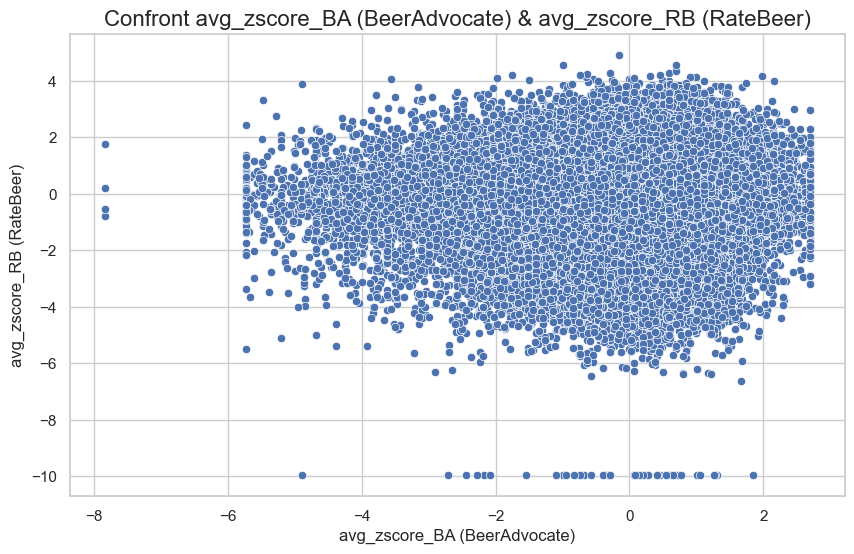

In [35]:
def scale_zscore(series):
    series = series.dropna()
    mean_val = series.mean()
    std_dev = series.std()
    if std_dev == 0:
        return series * 0  
    zscore_series = (series - mean_val) / std_dev
    
    return zscore_series

# Now, let's normalize the data by subtracting the mean and dividing by the standard deviation, and then check the distribution again
beers_BA_copy['avg_zscore'] = scale_zscore(beers_BA_copy['avg'])
beers_RB_copy['avg_zscore'] = scale_zscore(beers_RB_copy['avg'])

df_combined = pd.merge(beers_BA_copy[['beer_id', 'avg_zscore']].rename(columns={'avg_zscore': 'avg_zscore_BA'}), 
                       beers_RB_copy[['beer_id', 'avg_zscore']].rename(columns={'avg_zscore': 'avg_zscore_RB'}), 
                       on='beer_id', 
                       how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_zscore_BA', y='avg_zscore_RB', data=df_combined)
plt.title('Confront avg_zscore_BA (BeerAdvocate) & avg_zscore_RB (RateBeer)', fontsize=16)
plt.xlabel('avg_zscore_BA (BeerAdvocate)', fontsize=12)
plt.ylabel('avg_zscore_RB (RateBeer)', fontsize=12)
plt.show()

In [38]:
beers_BA_avg_zscore = beers_BA_copy['avg_zscore']
beers_RB_avg_zscore = beers_RB_copy['avg_zscore']
shapiro_BA = stats.shapiro(beers_BA_avg_zscore)
shapiro_RB = stats.shapiro(beers_RB_avg_zscore)

shapiro_output(shapiro_BA, 'BeerAdvocate')
shapiro_output(shapiro_RB, 'RateBeer')

min_length = min(len(beers_BA_avg_zscore), len(beers_RB_avg_zscore))
beers_BA_avg_zscore = beers_BA_avg_zscore[:min_length]
beers_RB_avg_zscore = beers_RB_avg_zscore[:min_length]
stat, p_value = wilcoxon(beers_BA_avg_zscore, beers_RB_avg_zscore)

print(f"\nStatistic test di Wilcoxon: {stat}, P-value: {p_value}")
p_value_eval(p_value)


Shapiro-Wilk test for avg_ba (BeerAdvocate):
Statistic : 0.9369571208953857, p-value: 0.0
The distribution BeerAdvocate is  not-normal.

Shapiro-Wilk test for avg_ba (BeerAdvocate):
Statistic : 0.935727059841156, p-value: 0.0
The distribution RateBeer is  not-normal.

Statistic test di Wilcoxon: 14431896778.0, P-value: 7.492160675428006e-154
There is a statistically significant difference between the scores.


C:\Users\chiar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## Consideration of the obtained result
For the **BeerAdvocate** dataset, we can observe that we have reduced the dataset to 247.982 out of 280.823 entries 88.30%. Part of this data also includes reviews, with only 81.333 entries lacking reviews. Regarding the distribution of ratings, we observe a wide standard deviation, while for reviews this value decreases but remains significant. On average, as expected, there are more ratings than reviews.

Regarding **RateBeer**, we start with a dataset that is already larger (442.081 rows) and does not have exactly the same columns as BeerAdvocate (it lacks 'nbr_review'). After filtering, we end up with 395.647 rows, thus retaining 89.49% of the data. The standard deviation of these ratings is lower compared to that of BeerAdvocate.

The distributions of 'avg' within the two datasets are not normal, and the two datasets do not follow the same distribution, so it is **not possible to merge them**. Therefore, we must conduct the analyses separately on the two datasets.

The processed datasets are *beers_BA_copy* and *beers_RB_copy*.

# Breweries Preprocessing
Now we want to proceed with the preprocessing for breweries!

*Note:* Analysing the *location* column data, we realised that there was ‘dirty’ data, with HTML elements and URLs inserted as part of the data instead of just clean location names. We therefore decided to cleanse the data of this information, making it all appear in the same format. There are also some data that has in *location* column something that starts with 'United State' and then has son caracter lik '| name_of_sites' (e.g. 16302    United States | maprockbottom.com), so we have to filter also this data.

We also note that again, for the United States we have data for all states within the United States, so we can do an analysis that considers all of the United States as one country and then go into depth on the distribution within the United States.


In [43]:
breweries_ba.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [117]:
utils.dataset_information(breweries_ba, "Breweries_BA")
utils.dataset_information(breweries_rb, "Breweries_RB")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False


########################################################
We are starting analysing dataset Breweries_RB
- Dimension of starting dataset: (24189, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False


In [118]:
print('Let now investigate the nbr_beers column of BeerAdvocate', breweries_ba['nbr_beers'].describe(),'\n')
print('Let now investigate the nbr_beers column of RateBeer',breweries_rb['nbr_beers'].describe())

Let now investigate the nbr_beers column of BeerAdvocate count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64 

Let now investigate the nbr_beers column of RateBeer count    24189.000000
mean        19.022655
std         31.542620
min          0.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64


In [119]:
import importlib
import scr.utils 
importlib.reload(scr.utils)

# Now we want to:
# - Print general information of starting dataset
# - Drop brewer with 0 beer and 
# - Clean 'location' entries
# - Obtain distribution for full dataset and evaluate statistics for each country
breweries_BA = utils.remove_zero_beer(breweries_ba, 'BeerAdvocate')
breweries_BA['location'] = breweries_BA['location'].apply(utils.clean_location)
dist_BA = utils.loc_distribution(breweries_BA, 'BeerAdvocate', 'location')

breweries_RB = utils.remove_zero_beer(breweries_rb, 'BeerAdvocate')
breweries_RB['location'] = breweries_RB['location'].apply(utils.clean_location)
dist_RB = utils.loc_distribution(breweries_RB, 'BeerAdvocate', 'location')

print('Let now investigate the nbr_beers column of BeerAdvocate', breweries_BA['nbr_beers'].describe(),'\n')
print('Let now investigate the nbr_beers column of RateBeer',breweries_RB['nbr_beers'].describe())

FILTER BLOCK
-- The dimension of starting dataset BeerAdvocate : 16758
-- The dimension of filtered dataset BeerAdvocate : 14522
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 277
FILTER BLOCK
-- The dimension of starting dataset BeerAdvocate : 24189
-- The dimension of filtered dataset BeerAdvocate : 24118
Dataset: BeerAdvocate
- Number of unique "location" value in the dataset: 267
Let now investigate the nbr_beers column of BeerAdvocate count    14522.000000
mean        24.298444
std         74.041044
min          1.000000
25%          3.000000
50%          8.000000
75%         21.000000
max       1196.000000
Name: nbr_beers, dtype: float64 

Let now investigate the nbr_beers column of RateBeer count    24118.000000
mean        19.078655
std         31.572100
min          1.000000
25%          3.000000
50%          8.000000
75%         20.000000
max        295.000000
Name: nbr_beers, dtype: float64


C:\Users\chiar\AppData\Local\Temp\ipykernel_53084\541848690.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_BA['location'] = breweries_BA['location'].apply(utils.clean_location)
C:\Users\chiar\AppData\Local\Temp\ipykernel_53084\541848690.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_RB['location'] = breweries_RB['location'].apply(utils.clean_location)


In [120]:
breweries_BA.tail()

,id,location,name,nbr_beers
16748,16233,"United States, California",Farmhouse Brewing Co.,4
16751,1613,"United States, Florida",Panama City Brewery & Cafe,5
16753,128,Germany,Privatbrauerei Franz Joseph Sailer,6
16755,1573,"United States, New York",John Harvard’s Brewery & Ale House,491
16756,16186,"United States, North Carolina",Triangle Brewing Company,20


In [121]:
# WE MISS TO SPLIT THE LOCATION 
breweries_BA['location_region'] = None
breweries_BA[['location', 'location_region']] = breweries_BA['location'].str.split(',', n=1, expand=True)
breweries_BA['location'] = breweries_BA['location'].str.strip()
breweries_BA.reset_index(drop = True, inplace=False)
breweries_BA = utils.update_location_and_region(breweries_BA)
breweries_BA['location_region'] = breweries_BA['location_region'].str.strip()

C:\Users\chiar\AppData\Local\Temp\ipykernel_53084\2426673237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_BA['location_region'] = None
C:\Users\chiar\AppData\Local\Temp\ipykernel_53084\2426673237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breweries_BA[['location', 'location_region']] = breweries_BA['location'].str.split(',', n=1, expand=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_53084\2426673237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

KeyError: 5